<a href="https://colab.research.google.com/github/aniketyadav20/Sprarks-Iternship/blob/main/Sparks_task2%20(KMeans%20Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : **Aniket Yadav**

## #Task 2 : K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

In this notebook, we make clusters in IRIS dataset

Required Libraries

pandas     - Used to handle dataframe

numpy      - Used to handle arrays

matplotlib - used to plot graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("/content/Iris.csv")

In [3]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df1.isnull().sum()   # check the null values in the dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df1.drop(['Species'],axis=1,inplace = True)

In [8]:
from sklearn.cluster import KMeans

In [9]:
#WCSS is within cluster sum of square
wcss=[]
k_range=range(1,11) # k ranges from 1 to 10
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df1)
  wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

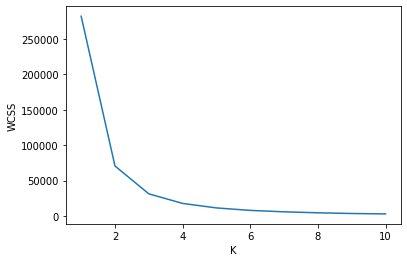

In [10]:
plt.plot(k_range,wcss)
plt.xlabel('K')
plt.ylabel('WCSS')

upper plot shows the shape of elbow i.e. it is called elbow curve.


We easily se that there is a large variation at point 3 on x-axis so we conclude that there is a higher possibility that we would take three cluster.

Text(0, 0.5, 'PetalWidthCm')

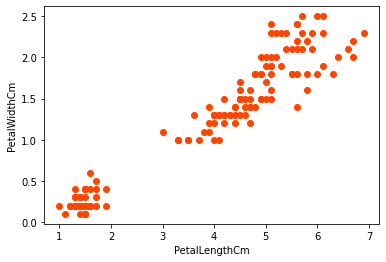

In [11]:
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='orangered')
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

In [12]:
# in these lines of code we standardize out columns for better accuracy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['PetalLengthCm']=scaler.fit_transform(df1[['PetalLengthCm']])
df1['PetalWidthCm']=scaler.fit_transform(df1[['PetalWidthCm']])

In [13]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,0.067797,0.041667
1,2,4.9,3.0,0.067797,0.041667
2,3,4.7,3.2,0.050847,0.041667
3,4,4.6,3.1,0.084746,0.041667
4,5,5.0,3.6,0.067797,0.041667


In [14]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df1[['PetalLengthCm','PetalWidthCm']])

In [15]:
#location of clusters 
km.cluster_centers_

array([[0.07864407, 0.06      ],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

In [16]:
df1['cluster']=y_predicted

In [17]:
df1.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,1,5.1,3.5,0.067797,0.041667,0
1,2,4.9,3.0,0.067797,0.041667,0
2,3,4.7,3.2,0.050847,0.041667,0
3,4,4.6,3.1,0.084746,0.041667,0
4,5,5.0,3.6,0.067797,0.041667,0
5,6,5.4,3.9,0.118644,0.125000,0
6,7,4.6,3.4,0.067797,0.083333,0
7,8,5.0,3.4,0.084746,0.041667,0
8,9,4.4,2.9,0.067797,0.041667,0
9,10,4.9,3.1,0.084746,0.000000,0


In [18]:
df1.cluster.unique()

array([0, 1, 2], dtype=int32)

In [19]:
df1_cluster1=df1[df1.cluster==0]
df2_cluster2=df1[df1.cluster==1]
df3_cluster3=df1[df1.cluster==2]

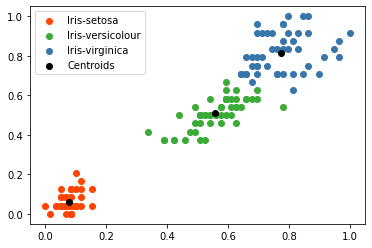

In [20]:
plt.scatter(df1_cluster1['PetalLengthCm'],df1_cluster1['PetalWidthCm'],color='orangered',label='Iris-setosa')
plt.scatter(df2_cluster2['PetalLengthCm'],df2_cluster2['PetalWidthCm'],color='#3bab37',label='Iris-versicolour')
plt.scatter(df3_cluster3['PetalLengthCm'],df3_cluster3['PetalWidthCm'],color='#3776ab',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='Centroids')
plt.legend()